#Integrantes del equipo
* Daniela Arbeláez Montoya
* Yuliza Fernanda Herreño Guisao
* Simón Castrillón Restrepo
* Christian Jiménez Arias

# 👁️ Clasificación de Enfermedades Oculares Mediante Deep Learning


---





# 1. Introducción

La detección temprana y precisa de enfermedades oculares es fundamental para prevenir la pérdida de visión y mejorar la calidad de vida de los pacientes. En los últimos años, el uso de técnicas de inteligencia artificial, particularmente redes neuronales profundas, ha demostrado un gran potencial en el ámbito del diagnóstico médico automatizado. Este proyecto tiene como propósito desarrollar un modelo de clasificación de imágenes médicas que identifique distintas patologías oculares a partir de una base de datos pública disponible en Kaggle. El enfoque se centra en aplicar redes neuronales convolucionales (CNN) para reconocer patrones visuales complejos y mejorar la precisión diagnóstica en comparación con métodos tradicionales.

## 2. Problemática

La detección y el diagnóstico de enfermedades oculares, como el glaucoma, la retinopatía diabética, las cataratas y otras afecciones, dependen en gran medida de la experiencia clínica y la interpretación visual de imágenes del fondo de ojo por parte de los oftalmólogos. Si bien este enfoque es fundamental, presenta desafíos inherentes:

1.  **Acceso limitado a especialistas:** En muchas regiones, especialmente en áreas rurales o con recursos limitados, el acceso a oftalmólogos capacitados es restringido. Esto puede llevar a retrasos en el diagnóstico y tratamiento, resultando en una progresión de la enfermedad y, en algunos casos, pérdida de visión irreversible.
2.  **Variabilidad en el diagnóstico:** La interpretación de imágenes médicas puede variar entre diferentes profesionales, lo que podría influir en la precisión y consistencia del diagnóstico.
3.  **Carga de trabajo:** El volumen creciente de pacientes y la necesidad de analizar un gran número de imágenes pueden generar una carga de trabajo considerable para los especialistas, afectando la eficiencia de los servicios de salud.
4.  **Detección temprana:** Algunas enfermedades oculares, como la retinopatía diabética y el glaucoma, pueden ser asintomáticas en sus etapas iniciales. La detección temprana es crucial para prevenir la pérdida de visión, pero requiere exámenes regulares que no siempre son accesibles para toda la población.

Abordar estos desafíos es crucial para mejorar la salud visual a nivel global. La aplicación de tecnologías de inteligencia artificial, específicamente el *deep learning*, ofrece una oportunidad prometedora para desarrollar herramientas de apoyo al diagnóstico que puedan:

*   Ampliar el alcance de la detección de enfermedades oculares a través de sistemas de cribado automatizado.
*   Asistir a los profesionales de la salud en la identificación rápida y precisa de posibles patologías.
*   Reducir la carga de trabajo manual en el análisis de imágenes.
*   Contribuir a la detección temprana, permitiendo intervenciones oportunas y mejorando los resultados para los pacientes.

Por lo tanto, este proyecto busca desarrollar un modelo de clasificación de imágenes basado en *deep learning* que pueda clasificar automáticamente imágenes de fondo de ojo en diferentes categorías de enfermedades oculares. Un modelo preciso y robusto podría servir como una herramienta valiosa para complementar la labor de los especialistas, mejorar la eficiencia del diagnóstico y, en última instancia, ayudar a prevenir la pérdida de visión en un mayor número de personas.

# 3. OBJETIVO GENERAL
Desarrollar un modelo de clasificación de imágenes médicas basado en redes neuronales profundas que permita identificar con precisión diferentes enfermedades oculares utilizando la base de datos “Eye diseases classification” de Kaggle.

##  3.1 Objetivos Específicos
* Preprocesar y explorar el conjunto de datos para garantizar su calidad y adecuación al modelo de aprendizaje profundo.

* Diseñar y entrenar una red neuronal convolucional (CNN) optimizada para la clasificación de imágenes médicas.

* Evaluar el rendimiento del modelo utilizando métricas como precisión, recall, F1-score y matriz de confusión.

* Comparar el desempeño del modelo propuesto con otros enfoques de clasificación existentes.

* Documentar el proceso de desarrollo y los resultados obtenidos, destacando las implicaciones clínicas y técnicas del modelo.

# 4. Análisis exploratorio de datos


---





## 4.1 Instalación de paquetes e importación de librerias

In [ ]:
!kaggle kernels pull mahnazarjmand/eye-diseases-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.1 MB/s eta 0:00:00


In [1]:
# Importar librerías necesarias para el tratamiento del DataSet
import os
import hashlib
import imagehash
import time
import cv2
import random
import numpy as np
import pandas as pd
import kagglehub
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Flatten

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'imagehash'

## 4.2 Obtención y carga del dataset
Se descargó el conjunto de datos Eye Diseases Classification utilizando la librería kagglehub. Posteriormente, se exploró la estructura de los archivos descargados para identificar las clases del problema. Para ello, se accedió a la carpeta principal dataset y, mediante os.listdir, se listaron sus subdirectorios, confirmando que sus nombres correspondían a cada una de las enfermedades a clasificar.

In [ ]:
# Descargar el dataset con kagglehub
path = kagglehub.dataset_download("gunavenkatdoddi/eye-diseases-classification")
print("Ruta de los archivos del dataset:", path)

Ruta de los archivos del dataset: /kaggle/input/eye-diseases-classification


In [ ]:
# Exploración de la estructura de carpetas e identificación de las clases.
dataset_path = os.path.join(path, "dataset")  # Carpeta donde están las clases
classes = os.listdir(dataset_path)
print("Clases encontradas:", classes)

Clases encontradas: ['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']


## 4.3 Visualización inicial de imágenes
Para realizar una inspección visual de los datos, se seleccionó una imagen de muestra por cada categoría. Se recorrió cada carpeta de clase, se cargó la primera imagen disponible y se corrigió su formato de color de BGR a RGB para una correcta visualización con Matplotlib. Finalmente, cada imagen se mostró en una figura conjunta  titulada con el nombre de su respectiva clase, lo que permitió obtener una vista rápida y representativa del contenido del dataset.

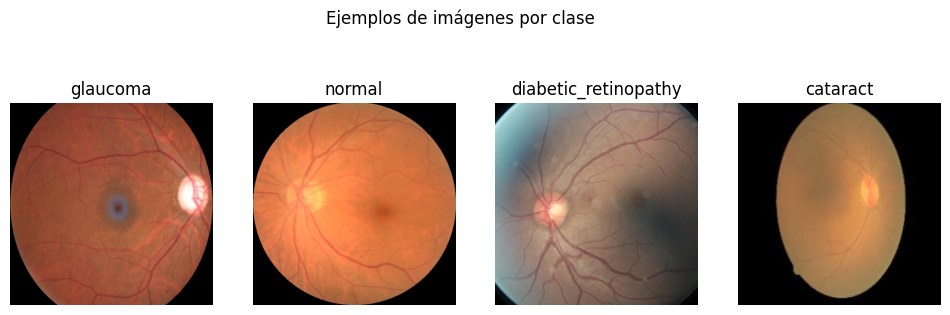

In [ ]:
# Mostrar una imagen representativa por clase

plt.figure(figsize=(12, 4))
for idx, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    first_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])

    img = cv2.imread(first_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(classes), idx + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.suptitle("Ejemplos de imágenes por clase")
plt.show()

###**Características visuales clave que permitirían diferenciar cada estado ocular**

Analizando la imagen proporcionada, se pueden detallar las características visuales clave que permitirían diferenciar cada estado ocular. Estas son las pistas que tanto un especialista como un modelo de visión por computadora buscarían para realizar un diagnóstico:

#### **1. Glaucoma**
El glaucoma es una enfermedad que daña el nervio óptico. El principal indicador visible está en el disco óptico.

* **Principal Indicador (Disco Óptico):** Se observa un **"acopamiento" o excavación aumentada**. La zona pálida central dentro del disco óptico es significativamente más grande en comparación con el ojo sano. Esto se debe a la pérdida de fibras nerviosas.
* **Vasos Sanguíneos:** Pueden parecer desplazados o doblarse de forma abrupta en el borde del disco óptico debido a la excavación.
* **Retina:** En las primeras etapas, el resto de la retina puede parecer completamente normal, por lo que el diagnóstico se centra casi exclusivamente en el estado del disco óptico.
* **Fibras nerviosas:** Adelgazamiento de la capa de fibras nerviosas, menos tejido alrededor del nervio óptico.

#### **2. Ojo Sano (Normal)**
Esta es la imagen de referencia para un fondo de ojo saludable.

* **Claridad y Nitidez:** La imagen es nítida y se aprecian todos los detalles con claridad.
* **Disco Óptico:** Es el círculo más brillante de donde nacen los vasos sanguíneos. Tiene un color rosado-anaranjado saludable y sus bordes están bien definidos. La pequeña depresión central (copa óptica) es de un tamaño reducido en proporción al disco.
* **Vasos Sanguíneos:** Las arterias y venas retinianas emergen del disco óptico y se ramifican de manera ordenada y suave, sin anomalías.
* **Retina:** El fondo tiene un color anaranjado-rojizo uniforme, sin manchas, lesiones ni hemorragias.
* **Mácula:** área central bien definida, ligeramente más oscura.

#### **3. Retinopatía Diabética (Diabetic Retinopathy)**
Esta condición es una complicación de la diabetes que afecta a los vasos sanguíneos de la retina.

* **Principal Indicador:** Presencia de lesiones en la retina debido a vasos sanguíneos dañados.
* **Características Buscadas:**
    * **Microaneurismas y Hemorragias:** Pequeños puntos rojos o manchas esparcidas por la retina. Son pequeñas dilataciones o sangrados de los vasos.
    * **Exudados Duros:** Puntos o manchas amarillentas y brillantes, que son depósitos de lípidos y proteínas que se han fugado de los vasos sanguíneos dañados.
    * **Neovascularización (en casos avanzados):** vasos anormales que crecen en la retina.
* **Aspecto General:** A diferencia del fondo limpio de un ojo sano, la retina aquí se ve "sucia" o con múltiples lesiones pequeñas.

#### **4. Catarata (Cataract)**
A diferencia de las otras, la catarata no es una enfermedad de la retina, sino una **opacidad del cristalino**, que es el lente natural del ojo.

* **Principal Indicador:** Pérdida general de nitidez y claridad en toda la imagen.
* **Características Buscadas:**
    * **Visión Borrosa o Nublada:** La imagen completa se ve como si se estuviera mirando a través de un vidrio empañado o sucio. Los detalles del disco óptico y los vasos sanguíneos están desenfocados y son difíciles de distinguir.
    * **Tonalidad Amarillenta/Marrón:** La opacidad del cristalino a menudo le da a toda la imagen un tinte amarillento o marrón, alterando los colores naturales de la retina.
* **Diferencia Clave:** Mientras que las otras condiciones muestran anomalías *sobre* una retina por lo demás clara, la catarata afecta la calidad de la *vista completa* de la retina.

## 4.4 Construcción de un DataFrame con información util para el análisis exploratorio de datos
Para llevar a cabo el análisis exploratorio, se construyó un **DataFrame de Pandas** que centralizó la información de todas las imágenes. Se implementó un proceso que recorrió sistemáticamente cada subcarpeta de clase dentro del dataset. Para cada archivo de imagen encontrado, se extrajeron y almacenaron sus metadatos clave: la **etiqueta** (el nombre de la enfermedad), la **ruta** del archivo, sus **dimensiones** (ancho y alto) y el **modo de color** (ej. RGB). Finalmente, toda esta información recopilada se consolidó en una única tabla estructurada, facilitando la manipulación y el análisis posterior de los datos.

In [ ]:
# Ruta a la carpeta original con las 4 clases
original_path = os.path.join(path, "dataset")

In [ ]:
# ============================================
# 1. CONSTRUCCION DATA FRAME
# ============================================
# Lista para guardar la info
data = []

# Recorremos cada carpeta (cada clase)
for label in os.listdir(original_path):
    label_path = os.path.join(original_path, label)

    if os.path.isdir(label_path):
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)

            try:
                with Image.open(img_path) as img:
                    data.append({
                        "label": label,
                        "path": img_path,
                        "width": img.width,
                        "height": img.height,
                        "mode": img.mode
                    })
            except Exception as e:
                print(f"Error con la imagen {img_path}: {e}")

# Crear DataFrame
meta_data = pd.DataFrame(data)
# Imprimir cantidad de imagenes en la base de datos
print(f"Total imágenes: {len(meta_data)}")

Total imágenes: 4217


In [ ]:
# Visualización del DataFrame
meta_data.sample(5)

,label,path,width,height,mode
3597,cataract,/kaggle/input/eye-diseases-classification/data...,256,256,RGB
1022,normal,/kaggle/input/eye-diseases-classification/data...,512,512,RGB
1900,normal,/kaggle/input/eye-diseases-classification/data...,512,512,RGB
2133,diabetic_retinopathy,/kaggle/input/eye-diseases-classification/data...,512,512,RGB
1670,normal,/kaggle/input/eye-diseases-classification/data...,512,512,RGB


## 4.5 Distribución de clases
Para analizar el balance del conjunto de datos, **se evaluó la distribución de imágenes por clase**. Primero, se realizó un conteo del número de archivos de imagen dentro de la carpeta de cada categoría. Posteriormente, esta información se utilizó para generar un **gráfico de barras** que representara visualmente la cantidad de muestras para cada enfermedad.

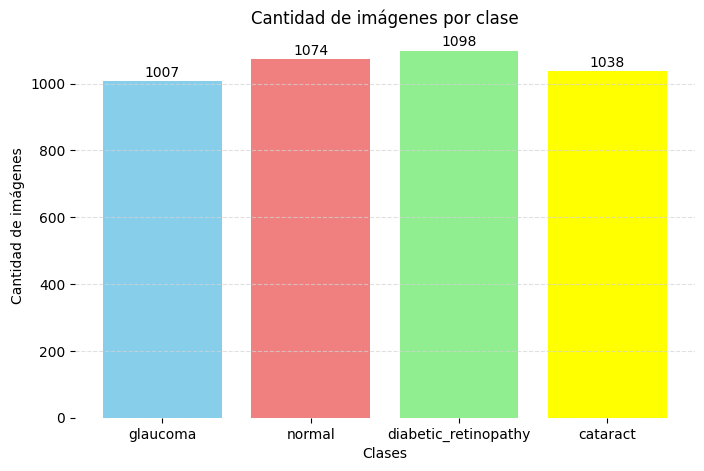

In [ ]:
# Conteo de imágenes por clase
counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}

plt.figure(figsize=(8, 5))
# Definir una lista de colores para cada barra
colors = ['skyblue', 'lightcoral', 'lightgreen', 'yellow']
plt.bar(counts.keys(), counts.values(), color=colors)
plt.title("Cantidad de imágenes por clase")
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
ax = plt.gca() # Asignar ejes

# Agregar el conteo de las clases
for i, (class_name, count) in enumerate(counts.items()):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Borrar el borde del grafico
for spine in ax.spines.values():
    spine.set_visible(False)

# Añadir lineas horizontales de referencia
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='lightgray')

plt.show()

## Hallazgo clave:
Se ha observado que la distribución del número de imágenes por clase es relativamente uniforme, con aproximadamente 1000 registros en cada categoría. Esta característica del conjunto de datos indica un balance adecuado entre las clases, lo cual es un factor favorable para el entrenamiento del modelo de clasificación, ya que reduce el riesgo de un sesgo significativo hacia alguna clase en particular y promueve un aprendizaje equitativo de las características distintivas de cada enfermedad.

## 4.6 Verificación de calidad de datos
Para asegurar la integridad del conjunto de datos, **se realizó una verificación de calidad** con el objetivo de encontrar archivos vacíos. Se implementó un proceso que **recorrió recursivamente todas las carpetas** del dataset para analizar cada archivo de manera individual. El criterio para identificar un archivo como defectuoso fue un **tamaño de cero bytes**. Finalmente, no se contaron archivos que cumplieron esta condición confirmando que no existen elementos que causen errores en las fases posteriores de entrenamiento.

In [ ]:
# Identificación de archivos dañados o vacios.
bad_files = []
for img_path in Path(original_path).rglob("*"):
    if img_path.is_file():
        if img_path.stat().st_size == 0:
            bad_files.append(img_path)

print(f"Archivos dañados ó vacíos: {len(bad_files)}")

Archivos dañados ó vacíos: 0


## 4.7 Análisis de dimensiones de las imagenes
Para entender la variabilidad en el tamaño de las imágenes, **se analizó la distribución de sus dimensiones**.

Primero, se construyó una **tabla dinámica** (`pivot table`) para obtener un conteo exacto de cuántas imágenes existían para cada combinación única de ancho y alto. A continuación, para facilitar la interpretación, esta información fue representada en un **gráfico de barras**.  Cada barra del gráfico correspondió a una dimensión específica (ej. "4288x2848") y su altura indicó la frecuencia de ese tamaño en el dataset. Este paso fue fundamental para identificar las dimensiones predominantes y decidir si era necesario un preprocesamiento de estandarización de tamaño.

In [ ]:
# Crear tabla dinámica con altura y ancho
pivot_dims = pd.pivot_table(
    meta_data,
    index='height',
    columns='width',
    values='path',
    aggfunc='count',
    fill_value=0
)

# Mostrar tabla
print("Tabla de distribución conjunta (altura vs ancho):")
display(pivot_dims)

Tabla de distribución conjunta (altura vs ancho):


width,256,512,1848,2464,2592
height,,,,,
256,1240,0,0,0,0
512,0,2776,0,0,0
1224,0,0,10,0,0
1632,0,0,0,41,0
1728,0,0,0,0,150


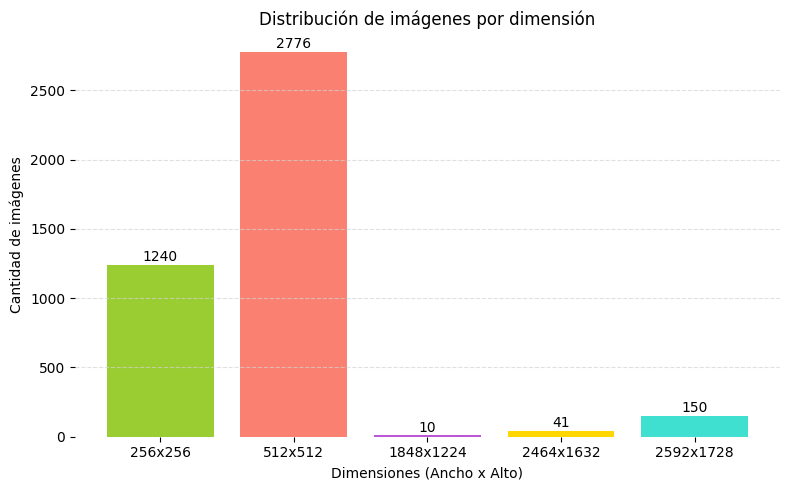

In [ ]:
# Crear un diccionario para almacenar la cantidad de imágenes por dimensión
dimension_counts = {}

# Iterar sobre la tabla dinámica (pivot_dims)
for height, row in pivot_dims.iterrows():
    for width, count in row.items():
        if count > 0:
            dimension_counts[f"{width}x{height}"] = count

# Crear un gráfico de barras para visualizar la distribución
dimensions = list(dimension_counts.keys())
counts = list(dimension_counts.values())

plt.figure(figsize=(8, 5))
ax = plt.gca() # Asignar ejes
colors = ['yellowgreen', 'salmon','mediumorchid', 'gold','turquoise']
bars = ax.bar(dimensions, counts, color=colors)
plt.title("Distribución de imágenes por dimensión")
plt.xlabel("Dimensiones (Ancho x Alto)")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()

# Agregar la cantidad en cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# Borrar el borde del grafico
for spine in ax.spines.values():
    spine.set_visible(False)

# Añadir lineas horizontales de referencia
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='lightgray')

plt.show()

## Hallazgo clave:
Se identificaron cinco dimensiones distintas en las que se distribuyen las imágenes de la base de datos. Considerando el tipo de modelo a implementar (redes neuronales convolucionales), su arquitectura, los recursos computacionales disponibles y la necesidad de preservar detalles clave para el diagnóstico, se decidió redimensionar todas las imágenes a **512×512 píxeles.** Este tamaño representa un equilibrio adecuado entre el consumo de recursos y la capacidad de mantener información relevante, como pequeñas lesiones de retinopatía, bordes del nervio óptico y opacidades asociadas a catarata.

## 4.8 Análisis de modo de color
Se verificó la consistencia del formato de color en todo el conjunto de datos. Para ello, se utilizó el método value_counts() sobre la columna mode del DataFrame previamente creado. Esta acción generó una tabla resumen que contabilizó el número de imágenes para cada modo de color detectado (ej. RGB, RGBA). El propósito fue confirmar rápidamente que todas las imágenes tuvieran un formato de color uniforme y adecuado para ser procesadas por el modelo de deep learning.

In [ ]:
display(meta_data['mode'].value_counts())

,count
mode,
RGB,4217


## 4.9 Detección de duplicados
Para evitar afectar la precisión del modelo se realizó un análisis exhaustivo para detectar y gestionar imágenes duplicadas. La presencia de duplicados puede introducir sesgos en el entrenamiento del modelo, afectar negativamente las métricas de evaluación y aumentar innecesariamente el costo computacional. Se abordó este problema desde dos perspectivas complementarias: la búsqueda de duplicados exactos a nivel de archivo y la de duplicados perceptuales, que son visualmente idénticos.

### 4.9.1 Duplicados exactos:
En esta primera fase, se buscaron archivos que fueran idénticos bit a bit. Para ello, se implementó un método basado en hashes criptográficos (MD5). El proceso consistió en leer el contenido binario completo de cada imagen para calcular una "huella digital" única. Si dos archivos diferentes producían el mismo hash, se consideraban duplicados exactos y se almacenaban sus rutas para su posterior revisión. Finalmente, se reportó la cantidad de duplicados encontrados y se visualizaron los pares de imágenes idénticas  para confirmar visualmente que el método había funcionado correctamente.

In [ ]:
# Uso de hashlib para identificar imágenes idénticas.
# Guardar sus rutas y las de las imagenes con las que coinciden.
hashes = {}
duplicates = []

for path in meta_data['path']:
    with open(path, 'rb') as f:
        hashval = hashlib.md5(f.read()).hexdigest()
        if hashval in hashes:
            duplicates.append((hashes[hashval], path))  # Guarda el par
        else:
            hashes[hashval] = path

print(f"Duplicados encontrados: {len(duplicates)}")
for dup in duplicates:
    print("Archivo 1:", dup[0], "| Archivo 2:", dup[1])

Duplicados encontrados: 2
Archivo 1: /kaggle/input/eye-diseases-classification/dataset/glaucoma/625_left.jpg | Archivo 2: /kaggle/input/eye-diseases-classification/dataset/cataract/625_left.jpg
Archivo 1: /kaggle/input/eye-diseases-classification/dataset/glaucoma/1415_right.jpg | Archivo 2: /kaggle/input/eye-diseases-classification/dataset/cataract/1415_right.jpg


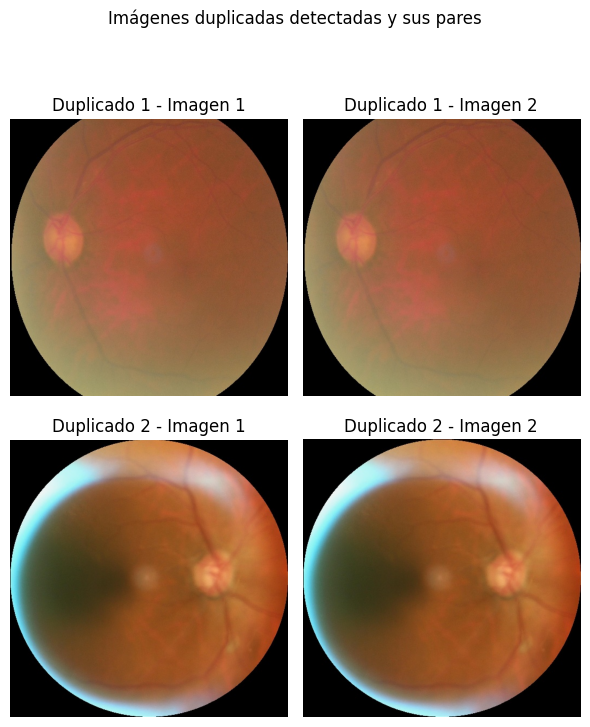

In [ ]:
# Visualizar las imágenes en 'duplicates'
plt.figure(figsize=(6, 8))

for i, duplicate_pair in enumerate(duplicates):
    # Primera imagen del par de duplicados
    img1 = cv2.imread(duplicate_pair[0])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, 2*i + 1)
    plt.imshow(img1)
    plt.title(f"Duplicado {i+1} - Imagen 1")
    plt.axis("off")

    # Segunda imagen del par de duplicados
    img2 = cv2.imread(duplicate_pair[1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, 2*i + 2)
    plt.imshow(img2)
    plt.title(f"Duplicado {i+1} - Imagen 2")
    plt.axis("off")


plt.suptitle("Imágenes duplicadas detectadas y sus pares")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar diseño para el título principal
plt.show()

### Hallazgo clave:
Según la ruta de los archivos detectados, se encontró que el mismo paciente fue etiquetado con catarata y glaucoma, es posible que un paciente tenga catarata y glaucoma al mismo tiempo. Eso es valioso para un médico, porque refleja la complejidad de la enfermedad ocular.

Pero este dataset no está diseñado como multietiqueta, sino como clasificación exclusiva (una sola clase por imagen). Es decir:

* Cada imagen debe estar en una sola carpeta (una sola etiqueta).

* No hay soporte para que una misma imagen tenga más de una etiqueta.

Por lo que hay que separar el valor clínico del valor para el modelo y eliminar el registro para evitar aportar ruido al modelo

4.9.1.1 Eliminar duplicados exactos

In [ ]:
hashes = {}
duplicates = []

for path in meta_data['path']:
    with open(path, 'rb') as f:
        hashval = hashlib.md5(f.read()).hexdigest()
        if hashval in hashes:
            duplicates.append((hashes[hashval], path))  # Guarda el par
        else:
            hashes[hashval] = path

print(f"\nDuplicados encontrados: {len(duplicates)}")
#for dup in duplicates:
#    print("Archivo 1:", dup[0], "| Archivo 2:", dup[1])


Duplicados encontrados: 2
Archivo 1: /kaggle/input/eye-diseases-classification/dataset/glaucoma/625_left.jpg | Archivo 2: /kaggle/input/eye-diseases-classification/dataset/cataract/625_left.jpg
Archivo 1: /kaggle/input/eye-diseases-classification/dataset/glaucoma/1415_right.jpg | Archivo 2: /kaggle/input/eye-diseases-classification/dataset/cataract/1415_right.jpg


### 4.9.2 Duplicados perceptuales:
A diferencia del método anterior, aquí el objetivo fue encontrar imágenes que, aunque no fueran idénticas a nivel de archivo (por ejemplo, por tener diferente compresión o metadatos), sí lo fueran visualmente para el ojo humano. Para esto, se utilizó la técnica de hashing perceptual (phash). Este algoritmo genera un hash basado en la estructura y el contenido visual de la imagen, siendo robusto a diferencias menores. Se recorrió todo el conjunto de datos, se calcularon estos hashes perceptuales y se identificaron y contaron las imágenes que compartían la misma huella visual.


In [ ]:
# Uso de imagehash para identificar imágenes visualmente parecidas.
perc_hashes = {}
perc_duplicates = []

for path in meta_data['path']:
    img = Image.open(path)
    phash = imagehash.phash(img)  # perceptual hash
    if phash in perc_hashes:
        perc_duplicates.append((perc_hashes[phash], path)) # Guarda el par
    else:
        perc_hashes[phash] = path

print(f"Duplicados perceptuales encontrados: {len(perc_duplicates)}")
#for dup_pair in perc_duplicates:
#    print("Archivo 1:", dup_pair[0], "| Archivo 2:", dup_pair[1])

Duplicados perceptuales encontrados: 29


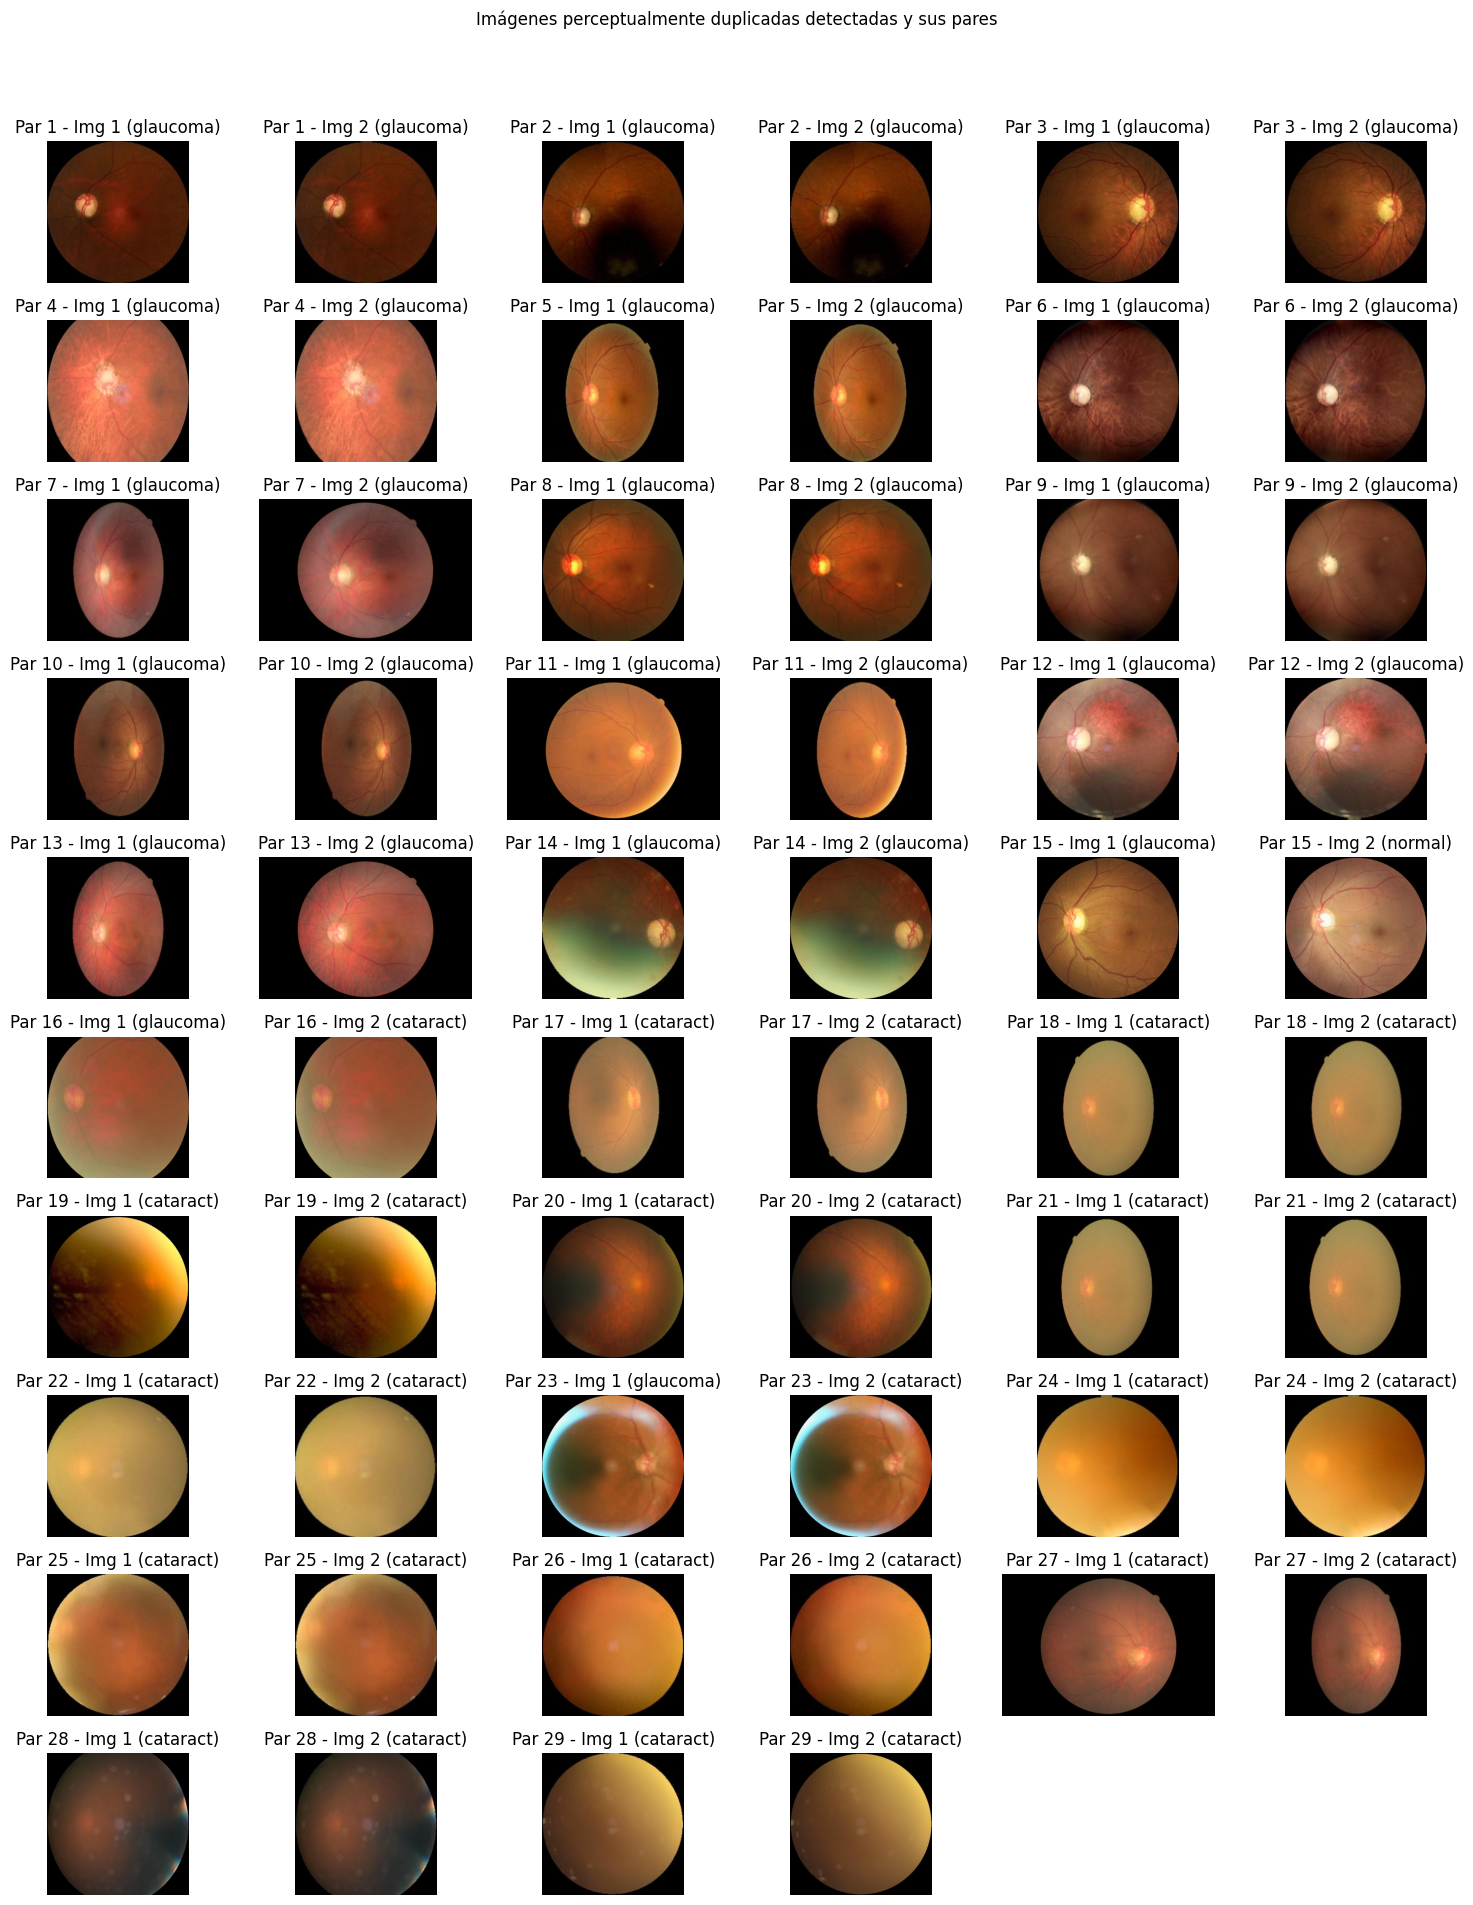

In [ ]:
# Visualizar las imágenes en 'perc_duplicates'
plt.figure(figsize=(15, 20))

for i, (img1_path, img2_path) in enumerate(perc_duplicates):
    if i * 2 + 2 > 60: # Limite de 60 imagenes (matriz 10x6)
        break

    # Traer la clase de las imagenes en 'perc_duplicates'
    img1_class = meta_data[meta_data['path'] == img1_path]['label'].iloc[0]
    img2_class = meta_data[meta_data['path'] == img2_path]['label'].iloc[0]

    # Primera imagen del par de duplicados
    img1 = cv2.imread(img1_path)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.subplot(10, 6, 2*i + 1)
    plt.imshow(img1)
    plt.title(f"Par {i+1} - Img 1 ({img1_class})")
    plt.axis("off")

    # Segunda imagen del par de duplicados
    img2 = cv2.imread(img2_path)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.subplot(10, 6, 2*i + 2)
    plt.imshow(img2)
    plt.title(f"Par {i+1} - Img 2 ({img2_class})")
    plt.axis("off")

plt.suptitle("Imágenes perceptualmente duplicadas detectadas y sus pares")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el diseño del título principal
plt.show()

### Hallazgo clave:
**Visualizando los duplicados perceptualmente detectados, se identifican los siguientes casos:**

1. Duplicados dentro de la misma clase (ej: glaucoma–glaucoma o cataract–cataract):

  * Aquí no aporta tener la misma imagen dos veces, porque el modelo puede memorizar esas muestras y sobrestimar su desempeño.

  * Lo recomendable es eliminar uno de los duplicados (quedarse con solo una copia).

2. Duplicados entre clases distintas (ej: glaucoma–cataract o glaucoma–normal):

  * Esto es un problema grave de ruido en el dataset: una misma imagen está en dos clases diferentes.

  * Si el dataset no trae metadatos confiables que digan cuál etiqueta es la correcta, lo mejor es eliminar esa imagen de todas las clases, para no introducir ambigüedad en el modelo.

  * Mantenerla en ambas categorías podría confundir al clasificador.

3. Casos clínicos con dos enfermedades (ej: glaucoma + catarata en el mismo ojo):

  * En teoría es posible y clínicamente válido, pero el modelo será de clasificación simple (una sola clase por imagen) por lo que para este caso esos ejemplos son ruido, no valor.

  * Si se quiere aprovechar casos multi-enfermedad, se tendría que convertir el problema en clasificación multilabel (ej: una imagen puede ser [Glaucoma=1, Cataract=1, Normal=0]).

**Conclusión:**

Eliminar duplicados dentro de la misma clase → dejar una sola copia.

Eliminar duplicados entre clases diferentes → no sirven para clasificación simple.

## 4.10 Verificación de lateralidad de los ojos
Para evitar que el modelo aprendiera patrones irrelevantes de orientación en lugar de características clínicas de las enfermedades, se realizó una verificación de la lateralidad de los ojos (izquierdo o derecho). Un desbalance significativo podría sesgar el aprendizaje del modelo. Este análisis se centró en extraer la información de lateralidad directamente de los nombres de archivo para luego cuantificar su distribución y verificar el balance dentro de cada una de las clases.

### 4.10.1 Detección de lateralidad a partir del nombre de archivo (_left, _right)

Para la detección, se implementó un proceso automatizado que recorrió todos los archivos del dataset. Se inspeccionó el nombre de cada imagen buscando las etiquetas `_left` o `_right` para determinar su lateralidad correspondiente. Toda esta información—el nombre del archivo, su clase y el lado del ojo identificado fue recopilada y organizada de manera estructurada en un DataFrame de Pandas, dejando los datos listos para el análisis cuantitativo.

In [ ]:
# Crear lista con nombre del archivo, clase y lateralidad
info_lat = []
for clase in os.listdir(original_path):
    clase_path = os.path.join(original_path, clase)
    if os.path.isdir(clase_path):
        for img in os.listdir(clase_path):
            if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                lateralidad = "left" if "_left" in img.lower() else "right" if "_right" in img.lower() else "unknown"
                info_lat.append([img, clase, lateralidad])

# Convertir a DataFrame
lat_df = pd.DataFrame(info_lat, columns=["filename", "class", "eye_side"])

### 4.10.2 Conteo por clase y lateralidad
Una vez extraída y organizada la información, se procedió a cuantificar la distribución de la lateralidad. Utilizando el DataFrame, se agruparon los datos simultáneamente por la clase de la enfermedad y por el lado del ojo para obtener un conteo exacto de cada subgrupo. Los resultados finales se presentaron en una tabla dinámica (pivot table), la cual mostró de forma clara y resumida el número de ojos izquierdos y derechos para cada categoría, permitiendo así evaluar de manera efectiva el balance de lateralidad en el conjunto de datos.

In [ ]:
lat_df['eye_side'].value_counts()

,count
eye_side,
unknown,1441
left,1400
right,1376


In [ ]:
# DataFrame con conteo por clase y lateralidad
lat_count = lat_df.groupby(["class", "eye_side"]).size().reset_index(name="count")

# Ver conteo en tabla
pivot = lat_count.pivot(index="class", columns="eye_side", values="count").fillna(0)
display(pivot)

eye_side,left,right,unknown
class,,,
cataract,152.0,146.0,740.0
diabetic_retinopathy,549.0,549.0,0.0
glaucoma,163.0,143.0,701.0
normal,536.0,538.0,0.0


#### Hallazgo clave:
Se identificaron 1441 imagenes ('unknown') que con el nombre del archivo no se puede detectar si son ojos izquierdos o derechos, los cuales si se quieren recategorizar según su lateralidad se tendría que construir y confiar en un algoritmo secundario solo para poder preprocesar esa parte de los datos, añadiendo una complejidad y un punto de fallo innecesarios al pipeline.

Otra alternativa es el aumento de datos con `RandomFlip`, que además soluciona esto de mejor manera, pues voltea horizontalmente de manera aleatoria y trata a las 4,217 imágenes exactamente de la misma manera. No necesita saber la lateralidad, no descarta ningún dato y no requiere algoritmos adicionales.

Además al estar balanceadas al rededor de 1400 imagenes por categoria ('right', 'left', 'unknown) es una situación ideal para el `RandomFlip` ya que es muy probable que se aplique a una mezcla equilibrada de orientaciones por lo que se aplicara este método en el preprocesamiento

## 4.11 Análisis de calidad de imagen
Se evaluó la calidad de las imágenes para identificar posibles problemas que afecten el entrenamiento del modelo. Este análisis incluyó la detección de imágenes oscuras, sobreexpuestas y con bajo contraste, ya que dichas condiciones pueden introducir ruido y dificultar la correcta extracción de características relevantes.

Para no afectar la robustez del modelo  e incluir ejemplos valiosos de la variabilidad de brillo y contraste que se podrían encontrar en la practica con fotos imperfectas, se definierón umbrales para en cada caso detectar solo los casos extremos.

### 4.11.1 Detección de imágenes subexpuestas.

Se detectaron y contabilizaron las imágenes con iluminación insuficiente mediante la comparación del brillo de cada imagen con un umbral de oscuridad nombrado `dark_treshold`, donde se categorizaron como imagenes subexpuestas  las cuales su brillo era menor al umbral.



In [ ]:
# Umbral de brillo
dark_treshold = 10

In [ ]:
# Lista para guardar rutas de imagenes a análizar
dark_images = []

# Recorrer cada carpeta en el directorio
for class_name in os.listdir(original_path):
    class_path = os.path.join(original_path, class_name)

    # Verificar si la carpeta esta en el directorio
    if os.path.isdir(class_path):
        # Recorre cada imagen en la carpeta de la clase
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Abre la imagen y la convierte a escala de grises
                    img = Image.open(img_path).convert('L')
                    img_array = np.array(img)

                    # Calcula el brillo (promedio)
                    brightness = img_array.mean()

                    # Captura imagenes con brillo menor al umbral definido
                    if brightness < dark_treshold:
                        dark_images.append(img_path)

                except Exception as e:
                    print(f"Could not process {img_path}: {e}")
                    pass

# Imprimir resultados
print(f"Imagenes oscuras encontradas: {len(dark_images)}")

Imagenes oscuras encontradas: 2


### 4.11.2 Detección de imágenes subexpuestas.
Se detectaron y contabilizaron las imágenes con exceso de brillo que saturan la información visual, al igual que en el punto anterior mediante la comparación del brillo de cada imagen con un umbral de brillo nombrado `bright_treshold`, donde se categorizaron como imagenes sobreexpuestas las cuales su brillo era mayor al umbral.

In [ ]:
# Umbral de brillo
bright_treshold = 200

In [ ]:
# Lista para guardar rutas de imagenes a analizar
overexposed_images = []

# Recorrer cada carpeta en el directorio
for class_name in os.listdir(original_path):
    class_path = os.path.join(original_path, class_name)

    # Verificar si la carpeta esta en el directorio
    if os.path.isdir(class_path):
        # Recorre cada imagen en la carpeta de la clase
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Abre la imagen y la convierte a escala de grises
                    img = Image.open(img_path).convert('L')
                    img_array = np.array(img)

                    # Calcula el brillo (promedio)
                    brightness = img_array.mean()

                    # Captura imagenes sobreexpuestas, con brillo mayor al umbral definido
                    if brightness > bright_treshold:
                        overexposed_images.append(img_path)

                except Exception as e:
                    print(f"Could not process {img_path}: {e}")
                    pass

# Imprimir resultados
print(f"Imagenes sobreexpuestas encontradas: {len(overexposed_images)}")

Imagenes sobreexpuestas encontradas: 2


### 4.11.3 Detección de imágenes con bajo contraste.
Se detectaron las imágenes con contraste reducido, con el fin de buscar imagenes borrosas también mediante la comparacion con un umbral de contraste nombrado `contrast_treshold`, donde se categorizaron como imagenes con bajo contraste a las imagenes con un contraste menor al umbral.

In [ ]:
# Umbral de contraste
contrast_treshold = 10

In [ ]:
# Lista para guardar rutas de imagenes a análizar
low_contrast_images = []

# Recorrer cada carpeta en el directorio
for class_name in os.listdir(original_path):
    class_path = os.path.join(original_path, class_name)

    # Verificar si la carpeta esta en el directorio
    if os.path.isdir(class_path):
        # Recorre cada imagen en la carpeta de la clase
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Abre la imagen y la convierte a escala de grises
                    img = Image.open(img_path).convert('L')
                    img_array = np.array(img)

                    # Calcula el contraste (desviacion estandar)
                    contrast = img_array.std()

                    # Captura imagenes con contraste menor al umbral definido
                    if contrast < contrast_treshold:
                        low_contrast_images.append(img_path)

                except Exception as e:
                    print(f"Could not process {img_path}: {e}")
                    pass

# Imprimir resultados
print(f"Imagenes con bajo contraste encontradas: {len(low_contrast_images)}")

Imagenes con bajo contraste encontradas: 7


### 4.11.4 Visualización de imagenes detectadas
Se seleccionaron ejemplos representativos para analizar visualmente las imagenes detectadas, ya que la falta de luz, un exceso de iluminacion o un bajo contraste en la imagen puede ocultar detalles importantes, hacer irreconocibles la estructura del ojo, lesiones y/o caracteristicas de las enfermedades a diagnosticar.

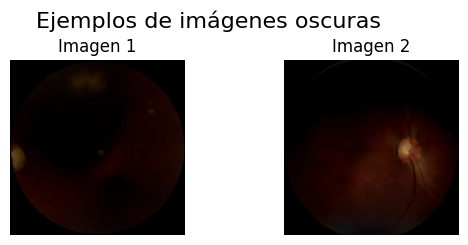

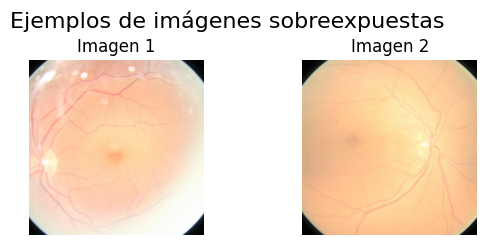

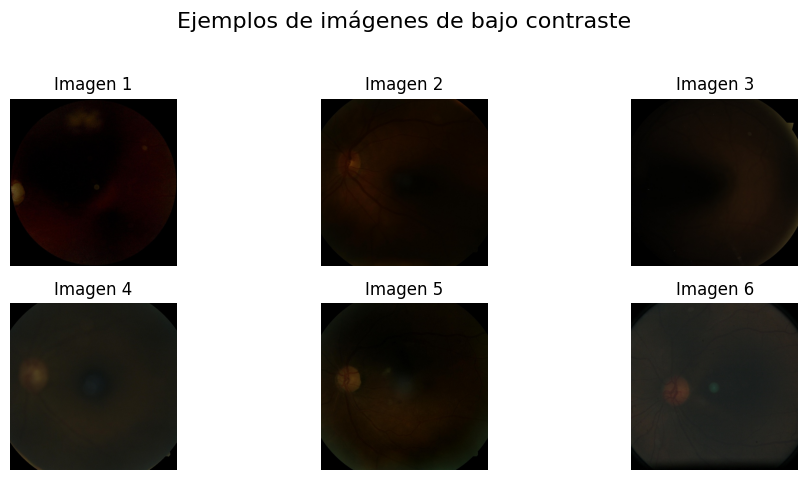

In [ ]:
# Visualizar imagenes subexpuestas
plt.figure(figsize=(10, 5))
plt.suptitle("Ejemplos de imágenes oscuras", fontsize=16, x=0.35)

for i, img_path in enumerate(dark_images[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Imagen {i+1}")
    plt.axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.03])
plt.show()

# Visualizar imagenes sobreexpuestas
plt.figure(figsize=(10, 5))
plt.suptitle("Ejemplos de imágenes sobreexpuestas", fontsize=16, x=0.35)

for i, img_path in enumerate(overexposed_images[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Imagen {i+1}")
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 0.1, 0.03])
plt.show()

# Visualizar imagenes con bajo contraste
plt.figure(figsize=(10, 5))
plt.suptitle("Ejemplos de imágenes de bajo contraste", fontsize=16)

for i, img_path in enumerate(low_contrast_images[:6]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Imagen {i+1}")
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Hallazgo clave:
**Imagenes subexpuestas:**
Estas dos imágenes son un ejemplo perfecto de casos extremos donde no es podible identificar con certeza las estructuras anatómicas básicas como la papila y los vasos sanguíneos principales, por lo que se eliminarán en el preprocesamiento.

**Imagenes sobreexpuestas**
A diferencia de las dos últimas imágenes subexpuestas, en estas si bien hay un exceso de iluminación aun se pueden identificar caracteristicas y las estructuras anatómicas por lo que se categorizan como datos "imperfectos pero útiles"

**Imagenes con bajo contraste**
Aquí, el problema no es la falta de información, sino que la información está "oculta" detrás de una capa de bajo contraste, en las muestras visualizadas aun con poca claridad son visibles la pupila y vasos sanguineos.<br><br>

**Conclusion:**
Salvo las imagenes subexpuestas, estas imágenes son candidatas para una técnica de preprocesamiento llamada CLAHE (Contrast Limited Adaptive Histogram Equalization), su objetivo principal es mejorar el contraste local en una imagen, revelando detalles en regiones que son demasiado oscuras o demasiado claras, sin lavar la imagen ni amplificar el ruido excesivamente..



# 5. Preprocesamiento de datos

## 5.1 Eliminar duplicados exactos y perceptuales

Eliminar las imágenes identificadas como duplicados tanto exactos como perceptuales, prestando especial atención a aquellas que aparecen en diferentes clases.


In [ ]:
# Lista para almacenar las rutas de los archivos a eliminar
files_to_remove = set()

# Eliminar duplicados exactos dentro de la misma clase (==)
for path1, path2 in duplicates:
    label1 = meta_data[meta_data['path'] == path1]['label'].iloc[0]
    label2 = meta_data[meta_data['path'] == path2]['label'].iloc[0]
    if label1 == label2:
        files_to_remove.add(path2) # Añadir el segundo archivo del par para eliminar

# Eliminar duplicados perceptuales dentro de la misma clase (==)
for path1, path2 in perc_duplicates:
    label1 = meta_data[meta_data['path'] == path1]['label'].iloc[0]
    label2 = meta_data[meta_data['path'] == path2]['label'].iloc[0]
    if label1 == label2:
        files_to_remove.add(path2) # Añadir el segundo archivo del par para eliminar


print(f"Número de duplicados exactos a eliminar: {len(files_to_remove)}")

# Eliminar duplicados exactos que aparecen en clases diferentes (!=)
for path1, path2 in duplicates:
    label1 = meta_data[meta_data['path'] == path1]['label'].iloc[0]
    label2 = meta_data[meta_data['path'] == path2]['label'].iloc[0]
    if label1 != label2:
        files_to_remove.add(path1)
        files_to_remove.add(path2)

# Eliminar duplicados perceptuales que aparecen en diferentes clases (!=)
for path1, path2 in perc_duplicates:
    label1 = meta_data[meta_data['path'] == path1]['label'].iloc[0]
    label2 = meta_data[meta_data['path'] == path2]['label'].iloc[0]
    if label1 != label2:
        files_to_remove.add(path1)
        files_to_remove.add(path2)

print(f"Número de duplicados en diferentes clases a eliminar: {len(files_to_remove)}")

# Eliminar los archivos
for file_path in files_to_remove:
    try:
        os.remove(file_path)
        print(f"Removed: {file_path}")
    except OSError as e:
        print(f"Error removing {file_path}: {e}")

# Actualizar DataFrame meta_data removiendo las filas correspondientes
meta_data = meta_data[~meta_data['path'].isin(files_to_remove)].reset_index(drop=True)
print(f"Total images after removing cross-class duplicates: {len(meta_data)}")

Número de duplicados exactos a eliminar: 26
Número de duplicados en diferentes clases a eliminar: 32
Error removing /kaggle/input/eye-diseases-classification/dataset/glaucoma/_253_8425650.jpg: [Errno 30] Read-only file system: '/kaggle/input/eye-diseases-classification/dataset/glaucoma/_253_8425650.jpg'
Error removing /kaggle/input/eye-diseases-classification/dataset/glaucoma/625_left.jpg: [Errno 30] Read-only file system: '/kaggle/input/eye-diseases-classification/dataset/glaucoma/625_left.jpg'
Error removing /kaggle/input/eye-diseases-classification/dataset/glaucoma/_41_2520996.jpg: [Errno 30] Read-only file system: '/kaggle/input/eye-diseases-classification/dataset/glaucoma/_41_2520996.jpg'
Error removing /kaggle/input/eye-diseases-classification/dataset/cataract/625_left.jpg: [Errno 30] Read-only file system: '/kaggle/input/eye-diseases-classification/dataset/cataract/625_left.jpg'
Error removing /kaggle/input/eye-diseases-classification/dataset/glaucoma/_71_9012457.jpg: [Errno 30]

## 5.2 Redimensionamiento de imágenes, técnica CLAHE y normalización de pixeles

Implementar técnicas de preprocesamiento, incluyendo el redimensionamiento y posiblemente CLAHE para mejorar el contraste de las imágenes identificadas con bajo contraste. Este paso prepara las imagenes para la división de los datos y el entrenamiento de los modelos.

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import random

# --- Función para aplicar CLAHE con OpenCV ---
def apply_clahe(image):
    # convertir a numpy uint8 (0-255)
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8).numpy()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  # pasamos a LAB
    l, a, b = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    image = cv2.merge((l,a,b))
    image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    return image.astype(np.uint8)

# --- Wrapper para integrarlo en tf.data ---
def random_clahe(image, label):
    def _apply(img):
        # aplicar CLAHE solo con cierta probabilidad
        if random.random() < 0.3:  # 30% de probabilidad
            img = apply_clahe(img)
        return img

    image = tf.py_function(_apply, [image], tf.uint8)
    image.set_shape([None, None, 3])  # se asegura forma dinámica
    return image, label

# --- Ejemplo con un dataset ---
# asumiendo que tienes dataset en tf.data
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    original_path,
    image_size=(224,224),
    batch_size=32
)

# aplicar data augmentation con CLAHE aleatorio
dataset = dataset.map(random_clahe)


Found 4217 files belonging to 4 classes.


In [ ]:
W = 256
H = 256

def load_and_preprocess_image(image_path):

    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"No es posible leer la imagen {image_path}. Skipping.")
            return None

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (W, H))

        # Check if the image was identified as low contrast and apply CLAHE
        if image_path in low_contrast_images:
            img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            clahe_img = clahe.apply(img_gray)
            # Convierte de nuevo a color fusionando la escala de grises mejorada
            # con CLAHE con los canales de color originales. Esto ayuda a retener
            # la información de color mientras mejora el contraste
            img = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)


        # Normalize pixel values
        img = img / 255.0

        return img

    except Exception as e:
        print(f"Error procesando imagen {image_path}: {e}")
        return None

# Aplicar la función de preprocesamiento a la columna 'path' para crear una
#nueva columna con imágenes preprocesadas
meta_data['preprocessed_image'] = meta_data['path'].apply(load_and_preprocess_image)

# Eliminar filas en las que falló la carga o el procesamiento de imágenes
meta_data.dropna(subset=['preprocessed_image'], inplace=True)

print("Image preprocessing complete.")
print(f"Total images after preprocessing: {len(meta_data)}")

Image preprocessing complete.
Total images after preprocessing: 4185


# 6. Modelado

## 6.1 Dividir datos y configurar Data Augmentation

Dividir el conjunto de datos limpio y preprocesado en conjuntos de entrenamiento, validación y prueba. Configurar `ImageDataGenerator` para el aumento de datos en el conjunto de entrenamiento.

In [ ]:
# Split the data into training and the rest (validation + test)
train_df, temp_df = train_test_split(meta_data, test_size=0.2, random_state=42, stratify=meta_data['label'])

# Dividir el resto de datos entre conjunto de prueba y validacion
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Definir data augmentation para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True, # Address eye lateralidad issue
    fill_mode='nearest'
)

# No augmentation for validation and test sets
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Crear generadores de datos
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(W, H),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(W, H),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(W, H),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Training set size: 3348
Validation set size: 418
Test set size: 419
Found 3348 validated image filenames belonging to 4 classes.
Found 418 validated image filenames belonging to 4 classes.
Found 419 validated image filenames belonging to 4 classes.


## 6.2 Definición de la arquitectura de la red neuronal

Definir la arquitectura de la red neuronal convolucional (CNN) para la clasificación.

In [ ]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(W, H, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax') # Output layer with number of classes
])

# Compilar el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el modelo

Usar los datos de imagen y one-hot etiquetas preprocesados para entrenar el modelo con `model.fit()`, especificando el número de épocas y los datos de validación.

In [ ]:
# Entrenar el modelo usando el generador de datos
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 86s 732ms/step - accuracy: 0.3851 - loss: 298.4148 - val_accuracy: 0.5359 - val_loss: 1.2954
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 127s 665ms/step - accuracy: 0.4826 - loss: 1.4741 - val_accuracy: 0.5239 - val_loss: 1.1508
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 70s 669ms/step - accuracy: 0.5155 - loss: 2.4745 - val_accuracy: 0.4856 - val_loss: 1.2457
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 74s 704ms/step - accuracy: 0.5441 - loss: 1.1126 - val_accuracy: 0.6124 - val_loss: 0.9154
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 674ms/step - accuracy: 0.5694 - loss: 1.0039 - val_accuracy: 0.5742 - val_loss: 1.0538
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 683ms/step - accuracy: 0.5791 - loss: 1.0154 - val_accuracy: 0.6507 - val_loss: 0.8527
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 659ms/step - accuracy: 0.6256 - loss: 0.8950 - val_accuracy: 0.6435 - val_loss: 0.8703
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 673ms/step - accuracy: 0.6283 - loss

## Definir y entrenar Modelo 2 (CNN con más neuronas)

Definir una nueva arquitectura de CNN basada en la anterior pero con un mayor número de neuronas en las capas densas, compilarla y entrenarla con los mismos datos y configuración de aumento de datos.

In [ ]:
# Definición de segundo modelo con mas neuronas
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(W, H, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'), # Increased neurons
    Dropout(0.6), # Increased dropout
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax') # Capa de salida con número de clases
])

# Compile the model
model_2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,684 (623.77 KB)

 Trainable params: 159,684 (623.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, callbacks
#Agregar Early Stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimun amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)
# Entrenar el modelo usando el generador de datos
history = model_2.fit(train_generator,
                    epochs=30,
                    callbacks=[early_stopping],
                    validation_data=val_generator)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 693ms/step - accuracy: 0.3121 - loss: 3.0520 - val_accuracy: 0.3995 - val_loss: 1.2726
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 70s 670ms/step - accuracy: 0.3782 - loss: 1.3204 - val_accuracy: 0.4330 - val_loss: 1.2046
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 659ms/step - accuracy: 0.5092 - loss: 1.1551 - val_accuracy: 0.6220 - val_loss: 0.9650
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 661ms/step - accuracy: 0.5460 - loss: 1.0268 - val_accuracy: 0.5622 - val_loss: 0.9426
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 655ms/step - accuracy: 0.5540 - loss: 1.0023 - val_accuracy: 0.6196 - val_loss: 0.9651
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 655ms/step - accuracy: 0.5769 - loss: 0.9513 - val_accuracy: 0.6364 - val_loss: 0.8444
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 682ms/step - accuracy: 0.5924 - loss: 1.0007 - val_accuracy: 0.5526 - val_loss: 0.9263
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 683ms/step - accuracy: 0.6202 - loss: 0

In [ ]:
#Definición tercer modelo
model_3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(W, H, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax') # Capa de salida con número de clases
])

# Compile the model
model_3.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,604 (506.27 KB)

 Trainable params: 129,604 (506.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo usando el generador de datos
history = model_3.fit(train_generator,
                    epochs=30,
                    callbacks=[early_stopping],
                    validation_data=val_generator)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 85s 728ms/step - accuracy: 0.3191 - loss: 2.9922 - val_accuracy: 0.6053 - val_loss: 0.9932
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 69s 656ms/step - accuracy: 0.5247 - loss: 1.0619 - val_accuracy: 0.6579 - val_loss: 0.9139
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 673ms/step - accuracy: 0.5802 - loss: 0.9592 - val_accuracy: 0.6364 - val_loss: 0.9073
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 79s 645ms/step - accuracy: 0.5866 - loss: 0.9149 - val_accuracy: 0.6866 - val_loss: 0.8410
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 673ms/step - accuracy: 0.6058 - loss: 0.9103 - val_accuracy: 0.6699 - val_loss: 0.8413
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6230 - loss: 0.9024 - val_accuracy: 0.6507 - val_loss: 0.8553
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 68s 646ms/step - accuracy: 0.5937 - loss: 0.8975 - val_accuracy: 0.6914 - val_loss: 0.7915
Epoch 8/30
 14/105 ━━━━━━━━━━━━━━━━━━━━ 57s 632ms/step - accuracy: 0.6129 - loss: 0.8

KeyboardInterrupt: 

## Comparación de Desempeño de Modelos

Hemos entrenado y evaluado dos modelos CNN. A continuación, se presentan sus métricas de desempeño en el conjunto de prueba para su comparación:

| Modelo      | Loss (Pérdida) | Accuracy (Precisión) |
|-------------|----------------|----------------------|
| Modelo 1    | {{loss:.4f}}   | {{accuracy:.4f}}     |
| Modelo 2    | {{loss_2:.4f}} | {{accuracy_2:.4f}}   |

**Análisis:**

*   Una menor "Loss" generalmente indica que el modelo se ajusta mejor a los datos.
*   Una mayor "Accuracy" indica que el modelo clasifica correctamente un mayor porcentaje de imágenes.

Con base en estas métricas, podemos comenzar a identificar cuál de los dos modelos ha tenido un mejor desempeño en el conjunto de prueba.

#Conclusiones

In [ ]:
# Importar VGG16 y capas necesarias
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Cargar el modelo VGG16 pre-entrenado en ImageNet
# Incluye_top=False excluye las capas completamente conectadas finales
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(W, H, 3))

# Congelar las capas convolucionales del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir nuevas capas densas para la clasificación
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Crear el modelo final
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

transfer_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,104,580 (88.14 MB)

 Trainable params: 8,389,892 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Entrenar el modelo de transferencia de aprendizaje
history_transfer = transfer_model.fit(train_generator,
                                      epochs=10,  # Puedes ajustar el número de épocas
                                      callbacks=[early_stopping], # Usamos el early stopping definido antes
                                      validation_data=val_generator)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 123s 972ms/step - accuracy: 0.5498 - loss: 14.0499 - val_accuracy: 0.6507 - val_loss: 0.9292
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 729ms/step - accuracy: 0.6326 - loss: 0.9390 - val_accuracy: 0.7033 - val_loss: 0.7671
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 719ms/step - accuracy: 0.6553 - loss: 0.9193 - val_accuracy: 0.7632 - val_loss: 0.6384
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 722ms/step - accuracy: 0.6698 - loss: 0.8553 - val_accuracy: 0.7632 - val_loss: 0.6233
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 718ms/step - accuracy: 0.6934 - loss: 0.7549 - val_accuracy: 0.6268 - val_loss: 0.9188
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 737ms/step - accuracy: 0.6954 - loss: 0.7235 - val_accuracy: 0.7656 - val_loss: 0.5717
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 719ms/step - accuracy: 0.7243 - loss: 0.6719 - val_accuracy: 0.7177 - val_loss: 0.6487
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 733ms/step - accuracy: 0.7205 - loss: